In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Dimension of source image is 1000x1600


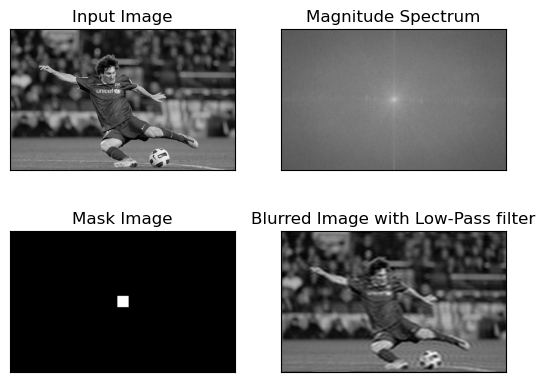

In [6]:
image = cv2.imread(r'C:\Users\ffah\Desktop\Projects\BEng Project\SIIT ML\Robotics Lecture\Robotics_code\week4\Figures\MessiOriginal.jpg',0) # read input/source image from file 
rows, cols = image.shape # obtain image dimension
print("Dimension of source image is {}x{}".format(rows,cols))
# "cv2.dft" : compute Discrete Fourier Transform
# output (dft) has two channels: real part and imaginary part
dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
# "np.fft.fftshift" : shift the result by N/2 in both directions
dft_shift = np.fft.fftshift(dft)
# compute power spectrum of image from dft magnitude
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(221),plt.imshow(image, cmap = 'gray') # turn img to gray
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

# create cropped area for mask dimension
crop_row = int(rows/2); crop_col = int(cols/2)
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,1),np.uint8)
mask[crop_row-40:crop_row+40, crop_col-40:crop_col+40] = 255
# apply mask to shifted discrete fourier transform of image 
fshift = cv2.bitwise_and(dft_shift,dft_shift,mask = mask)
# "np.fft.ifftshift" : inverser of fftshift 
f_ishift = np.fft.ifftshift(fshift)
# "cv2.idft" : compute inverse DFT
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(223),plt.imshow(mask, cmap = 'gray')
plt.title('Mask Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_back, cmap = 'gray')
plt.title('Blurred Image with Low-Pass filter'), plt.xticks([]), plt.yticks([])
plt.show()